In [73]:
import numpy as np 
import pandas as pd 

In [75]:
airpas = pd.read_csv(r"/Users/himanshutalekar/Downloads/AirPassengers.csv")

In [77]:
airpas.head(50)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [79]:
airpas.Month = pd.to_datetime(airpas.Month,infer_datetime_format=True)

/var/folders/q6/cwgjcsz54q31rwmftrxq2dhw0000gn/T/ipykernel_56764/99347779.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  airpas.Month = pd.to_datetime(airpas.Month,infer_datetime_format=True)


In [81]:
airpas = airpas.set_index(['Month'])

In [83]:
airpas.shape

(144, 1)

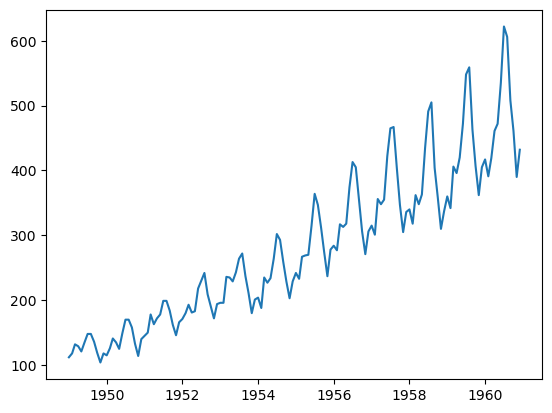

In [85]:
import matplotlib.pyplot as plt
plt.plot(airpas)

In [87]:
airpas.diff()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


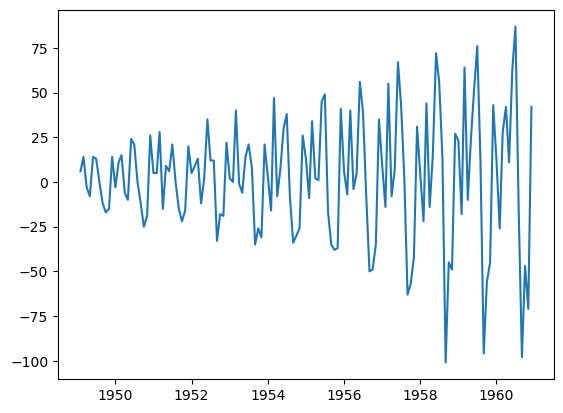

In [89]:
plt.plot(airpas.diff())

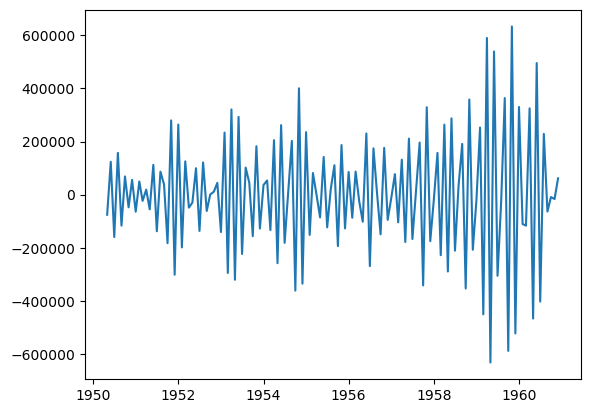

In [91]:
plt.plot(airpas.diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff())

In [93]:
airpas_log = np.log(airpas)

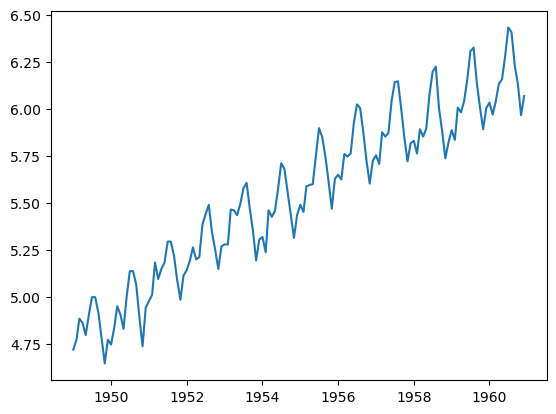

In [95]:
plt.plot(airpas_log)

plt.plot(airpas_log.diff())

In [98]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

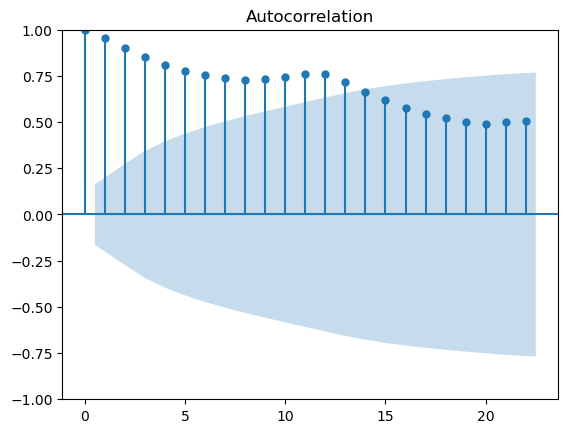

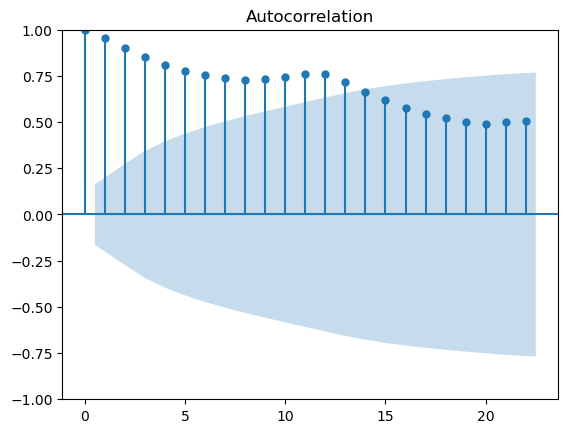

In [100]:
plot_acf(airpas_log)

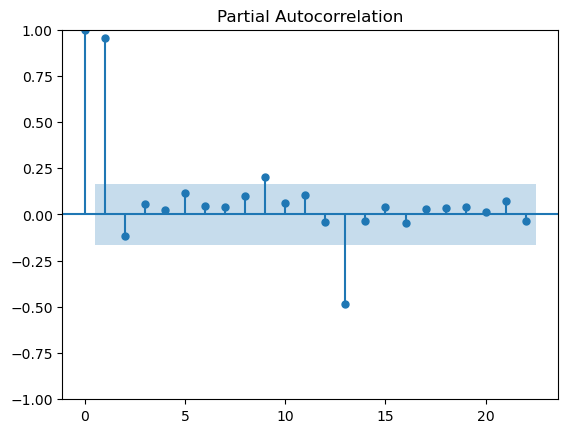

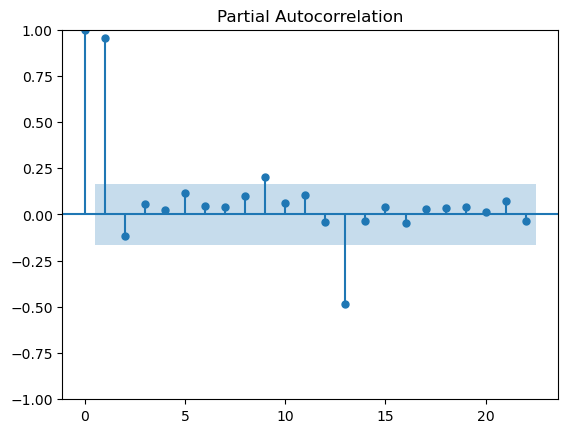

In [102]:
plot_pacf(airpas_log)

In [105]:
!pip install pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

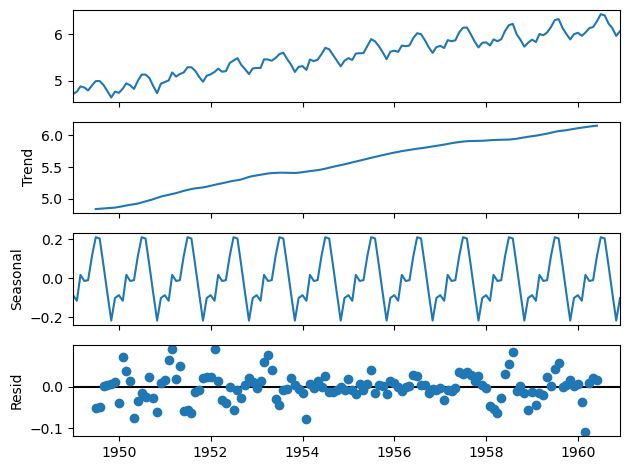

In [107]:
result = seasonal_decompose(airpas_log)
result.plot();

In [109]:
auto_arima(airpas_log,seasonal=True,m=12)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [110]:
model_sarima = SARIMAX(airpas_log , order=(2,0,0),seasonal_order=(0,1,1,12))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [112]:
airpas_model = model_sarima.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.54314D+00    |proj g|=  1.79521D+00

At iterate    5    f= -1.67853D+00    |proj g|=  1.52031D+00

At iterate   10    f= -1.68069D+00    |proj g|=  2.13729D-01

At iterate   15    f= -1.68282D+00    |proj g|=  1.31188D+00


 This problem is unconstrained.



At iterate   20    f= -1.68382D+00    |proj g|=  1.93598D-02

At iterate   25    f= -1.69207D+00    |proj g|=  1.05358D+00

At iterate   30    f= -1.69917D+00    |proj g|=  6.13846D-02

At iterate   35    f= -1.69937D+00    |proj g|=  7.18466D-03

At iterate   40    f= -1.69937D+00    |proj g|=  1.10115D-02

At iterate   45    f= -1.69937D+00    |proj g|=  5.17768D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     45     73      1     0     0   5.178D-03  -1.699D+00
  F =  -1.6993729027843789     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [124]:
pred_values = airpas_model.predict(start = 144 ,end=155)

In [126]:
pred_values

1961-01-01    6.103783
1961-02-01    6.045709
1961-03-01    6.162343
1961-04-01    6.188776
1961-05-01    6.220781
1961-06-01    6.355684
1961-07-01    6.493001
1961-08-01    6.487328
1961-09-01    6.307814
1961-10-01    6.190936
1961-11-01    6.044135
1961-12-01    6.147425
Freq: MS, Name: predicted_mean, dtype: float64

In [128]:
pred_values1 = np.exp(pred_values)

In [130]:
pred_values1

1961-01-01    447.547703
1961-02-01    422.297067
1961-03-01    474.538397
1961-04-01    487.249169
1961-05-01    503.096233
1961-06-01    575.756290
1961-07-01    660.502548
1961-08-01    656.765926
1961-09-01    548.843992
1961-10-01    488.303051
1961-11-01    421.632731
1961-12-01    467.511954
Freq: MS, Name: predicted_mean, dtype: float64

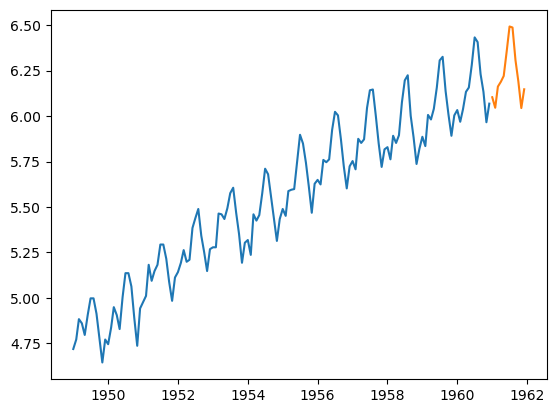

In [136]:
 plt.plot(airpas_log)
plt.plot(pred_values)

In [142]:
df = pd.DataFrame()
df['Predicted'] = pred_values1
date_for_pred = ['1961-01-01','1961-02-01','1961-03-01','1961-04-01','1961-05-01','1961-06-01','1961-07-01','1961-08-01','1961-09-01','1961-10-01','1961-11-01','1961-12-01']
df['Month'] = date_for_pred
df.Month = pd.to_datetime(df.Month , infer_datetime_format=True)
df = df.set_index(['Month'])


/var/folders/q6/cwgjcsz54q31rwmftrxq2dhw0000gn/T/ipykernel_56764/1819512925.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df.Month = pd.to_datetime(df.Month , infer_datetime_format=True)


<Axes: xlabel='Month'>

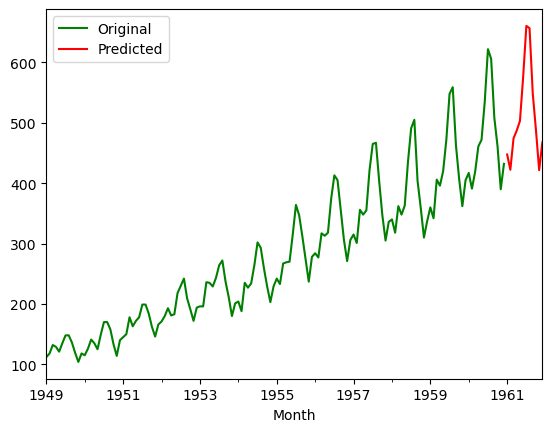

In [144]:
airpas['Passengers'].plot(legend=True , label='Original' , color='green')
df['Predicted'].plot(legend = True , label = 'Predicted' , color = 'red')